In [131]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import os
import scipy.io
import pdb
from glob import glob

In [132]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [203]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(15, 8)

## Toy Dataset

To specify a weight hyperparameter value (eg. lambda=1.0) for cycle-consistency regularizer, runs like

```
python alice_toy.py --lambda 1.0
```

The result will be saved in a *.mat file, read the file like:
```
R = scipy.io.loadmat('2noise_ali_0_1.mat')
icp = R['icp'][0,:]
mse = R['mse'][:,0,0]
```   

In [123]:
# Style
figsize(10, 5)
plt.rc('text', usetex=True)

# Create directory to save figs
fig_dir = 'figures/'
directory = fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)

In [83]:
dat_toy_mean_icp = [dat_toy_mean[2*i+0] for i in range(5)]
dat_toy_mean_mse = [dat_toy_mean[2*i+1] for i in range(5)]
dat_toy_std_icp = [dat_toy_std[2*i+0] for i in range(5)]
dat_toy_std_mse = [dat_toy_std[2*i+1] for i in range(5)]

dat_toy_icp = vstack((lambda_toy, dat_toy_mean_icp, dat_toy_std_icp)).T
dat_toy_mse = vstack((lambda_toy, dat_toy_mean_mse, dat_toy_std_mse)).T

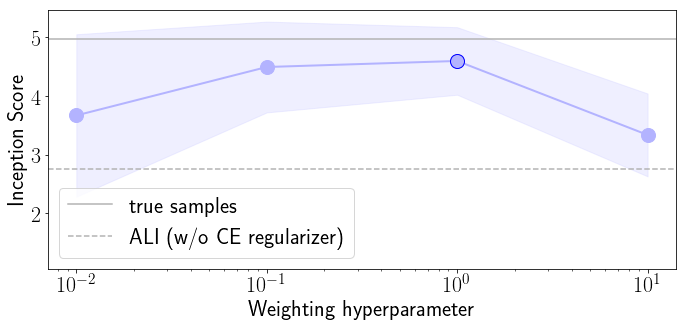

In [121]:
plot_hyperpara_ff(dat_toy_icp,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'toy_icp_weighting', metric='icp', pperf=4.977)

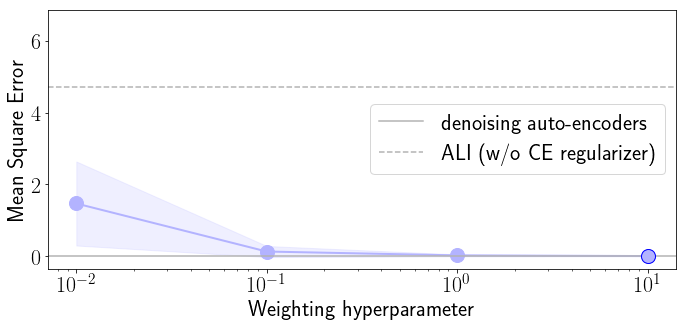

In [122]:
plot_hyperpara_ff(dat_toy_mse,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'toy_mse_weighting', metric='mse', pperf=0.003 )

## MNIST

To specify a weight hyperparameter value (eg. lambda=1.0) for cycle-consistency regularizer, runs like

```
python alice_mnist.py --lambda 1.0
```

In [110]:
dat_MNIST_ALICE_ICP = array([
    [0, 8.749, 0.09],
    [0.00001, 8.851, 0.08],
    [0.0001, 8.869, 0.10],
    [0.001, 8.901, 0.09],
    [0.01, 9.1045, 0.07],
    [0.1, 9.2618, 0.04],
    [1, 9.279, 0.07],
    [10, 8.918, 0.11],
    [100, 8.533, 0.09],
    [1000, 7.776, 0.10],
    [10000, 1.334, 0.01]
])

dat_MNIST_ALICE_MSE = array([
    [0, 0.4803, 0.100],
    [0.00001, 0.5012, 0.039],
    [0.0001, 0.5272, 0.037],
    [0.001, 0.4567, 0.024],
    [0.01, 0.1721, 0.012],
    [0.1, 0.0982, 0.008],
    [1, 0.0803, 0.007],
    [10, 0.0856, 0.006],
    [100, 0.2228, 0.014],
    [1000, 0.2389, 0.026],
    [10000, 0.1107, 0.005]
])

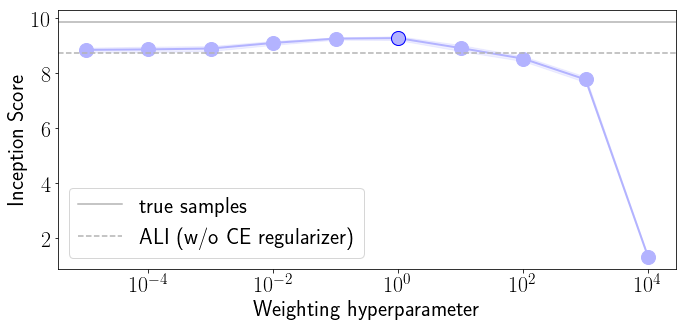

In [116]:
plot_hyperpara_ff(dat_MNIST_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'mnist_icp_weighting', metric='icp', pperf=9.8793)

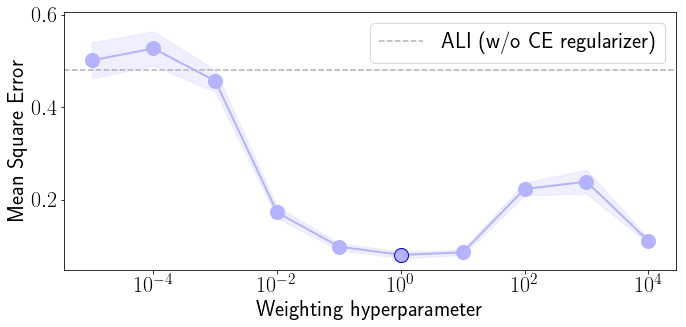

In [117]:
plot_hyperpara_ff(dat_MNIST_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'mnist_mse_weighting', metric='mse')

## CIFAR

In [118]:
dat_CIFAR_ALICE_ICP = array([
    [0, 5.93, 0.0437],
    [1.00E-06, 6.015, 0.0284],
    [1.00E-04, 5.994, 0.0305],
    [1.00E-02, 5.83, 0.0221],
    [1.00E-01, 4.42, 0.0247],
    [5.00E-01, 3.02, 0.0222],
    [1.00E+00, 2.18, 0.0204],
    [1.00E+01, 1.942, 0.0156],
    [5.00E+01, 1.32, 0.0122],
    [1.00E+02, 1.22, .0172],
    [1.00E+03, 1.08, 0.0211]
])

dat_CIFAR_ALICE_MSE = array([
    [0, 0.672, 0.1129],
    [1.00E-06, 0.4155, 0.2015],
    [1.00E-04, 0.2902, 0.1071],
    [1.00E-02, 0.1553, 0.0566],
    [1.00E-01, 0.0991, 0.0349],
    [5.00E-01, 0.0786, 0.0198],
    [1.00E+00, 0.0561, 0.0281],
    [1.00E+01, 0.0321, 0.00198],
    [5.00E+01, 0.0323, 0.003108],
    [1.00E+02, 0.0295, 0.00221],
    [1.00E+03, 0.0217, 0.00176]
])

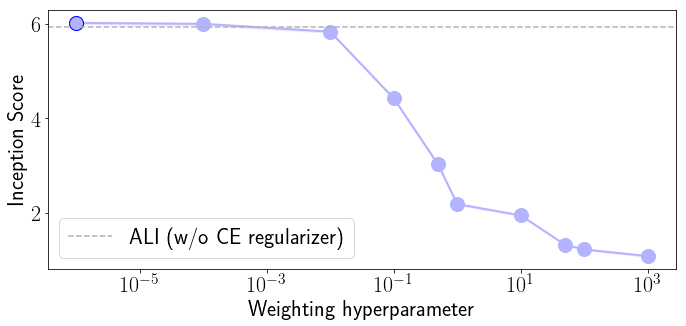

In [119]:
plot_hyperpara_ff(dat_CIFAR_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'cifar_icp_weighting', metric='icp')

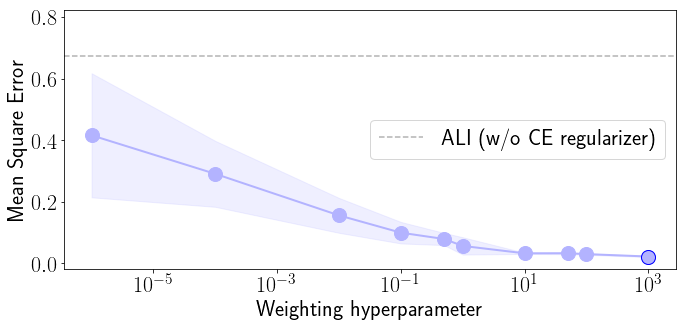

In [120]:
plot_hyperpara_ff(dat_CIFAR_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'cifar_mse_weighting', metric='mse')

## Alice in Wonderland

In [318]:
def plot(samples,mb_size, anchors=None, saveas=None):
    ss = int(np.sqrt(mb_size))
    fig = plt.figure(figsize=(ss*2, ss*2))
    gs = gridspec.GridSpec(ss, ss)
    gs.update(wspace=0.05, hspace=0.05)
    # pdb.set_trace()
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal') 
        plt.imshow(sample)
        if anchors:
            if i in anchors:
                ax.add_patch(
                    patches.Rectangle(
                        (0.1, 0.1),
                        0.5,
                        0.5,
                        fill=False      # remove background
                    )
                ) 
    if saveas:
        savefig('%s.pdf' % saveas, bbox_inches='tight')
    return fig


def load_train_data(image_path, load_size=286, fine_size=256, is_testing=False):
    img_A = imread(image_path)
    if not is_testing:
        img_A = scipy.misc.imresize(img_A, [load_size, load_size])
        h1 = int(np.ceil(np.random.uniform(1e-2, load_size-fine_size)))
        w1 = int(np.ceil(np.random.uniform(1e-2, load_size-fine_size)))
        img_A = img_A[h1:h1+fine_size, w1:w1+fine_size]

        # if np.random.random() > 0.5:
        #     img_A = np.fliplr(img_A)
    else:
        img_A = scipy.misc.imresize(img_A, [fine_size, fine_size])

    img_A = img_A/255.0
    return img_A

In [319]:
def sort_paths(fpaths, idx_num=10):
    idx_img = np.array([int(p.split('/')[-1].split('.')[0].split('_')[idx_num]) for p in fpaths])
    idx2 = np.argsort(idx_img)
    fpaths = [fpaths[i] for i in idx2]
    return fpaths

In [320]:
dstart, d_middle, dend = 91, 111, 143

# Create directory to save figs
alice_fig_dir = 'figures_alice/'
directory = alice_fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)


Training dataset: cartoon and edge images

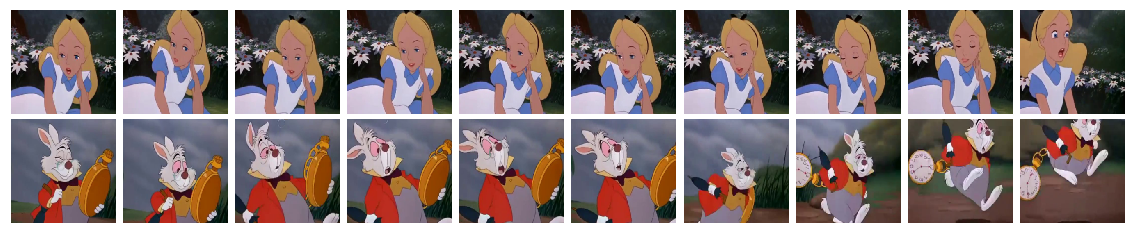

In [286]:
gt_C = sort_paths(glob('./images/256/color_256/*.*'))
data_train_C = gt_C[dstart:d_middle-2:2] + gt_C[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_train_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_C = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_real')

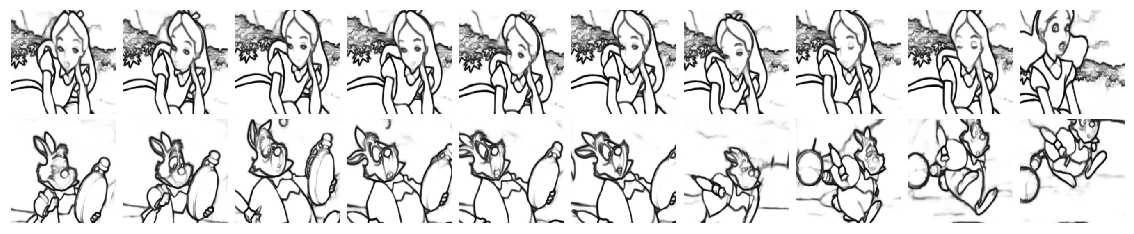

In [277]:
gt_E = sort_paths(glob('./images/256/edge_256/*fused.*'))
data_train_E = gt_E[dstart:d_middle-2:2] + gt_E[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_train_E]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'edges_fused_real')




After 120 Epoch

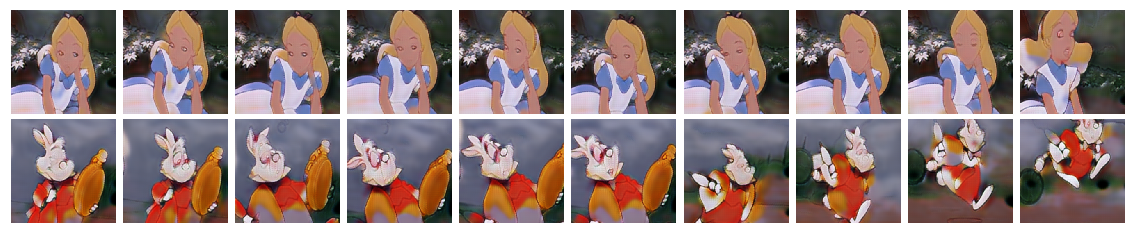

In [278]:
cyclegan_120 = sort_paths(glob('./images/cyclegan_test_dir_fused_6002/*fused.*'),11)
generated_C = cyclegan_120[dstart:d_middle-2:2] + cyclegan_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_cyclegan_120')

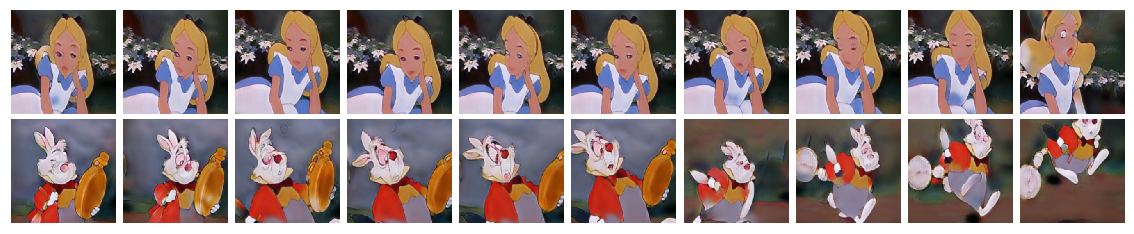

In [279]:
alice_imp_120 = sort_paths(glob('./images/alice_imp_test_dir_fused_6002/*fused.*'),11)
generated_C = alice_imp_120[dstart:d_middle-2:2] + alice_imp_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_imp_120')

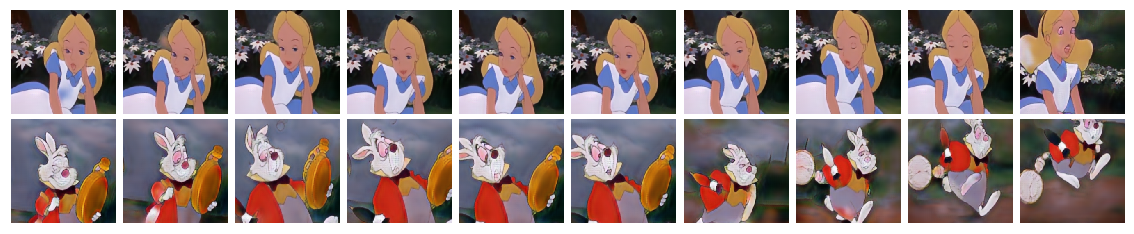

In [280]:
alice_exp_120 = sort_paths(glob('./images/alice_exp_test_dir_fused_6002/*fused.*'),11)
generated_C =  alice_exp_120[dstart:d_middle-2:2] + alice_exp_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_exp_120')

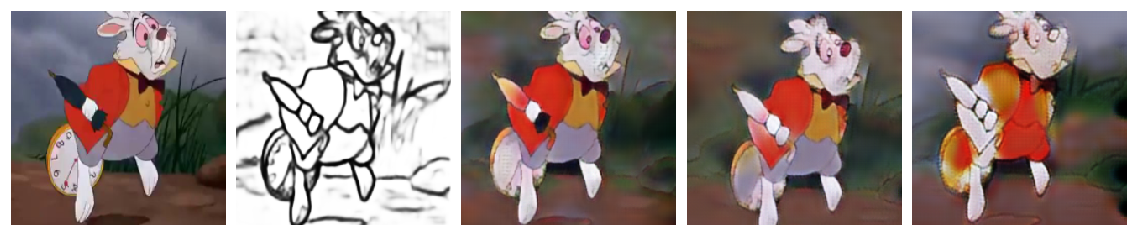

In [295]:
test_dstart, test_dend = 83, 133

dat_120 = [gt_C, gt_E, alice_exp_120, alice_imp_120, cyclegan_120]

image_list = [ d[test_dend] for d in dat_120 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
fig_zoom = plot_zoom(batch_images,n_row=1,n_col=5, ratio=20.0, saveas=None)



After 200 Epoch...

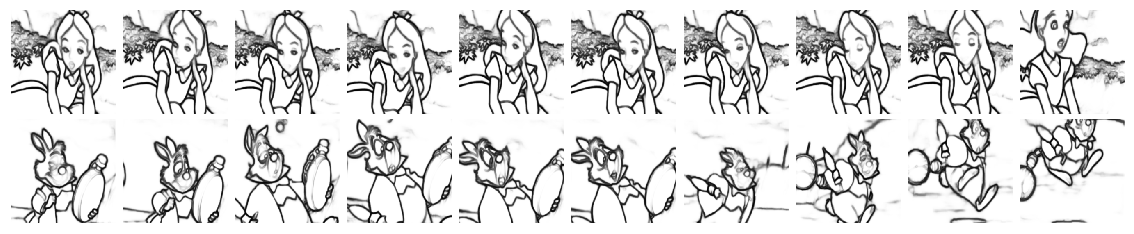

In [297]:
edge_type = '*fused.*' # '*out3.*'
gt_E = sort_paths(glob('./images/256/edge_256/'+edge_type))
data_E = gt_E[dstart:d_middle-2:2] + gt_E[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_E]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'edges_out3_real')

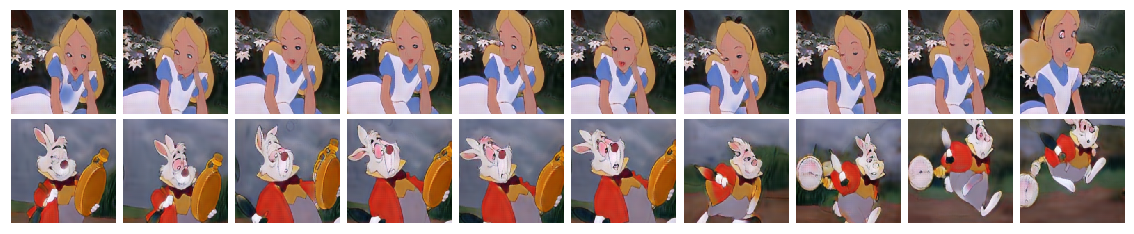

In [298]:
cyclegan_200 = sort_paths(glob('./images/cyclegan_test_dir/'+edge_type),11)
generated_C = cyclegan_200[dstart:d_middle-2:2] + cyclegan_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_cyclegan_200')

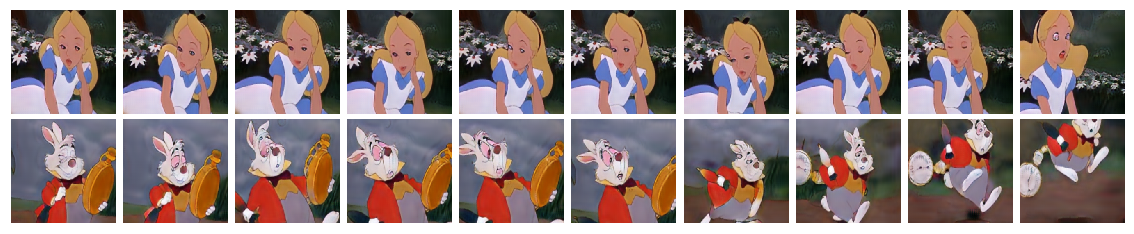

In [299]:
alice_imp_200 = sort_paths(glob('./images/alice_imp_test_dir/'+edge_type),11)
generated_C = alice_imp_200[dstart:d_middle-2:2] + alice_imp_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_imp_200')

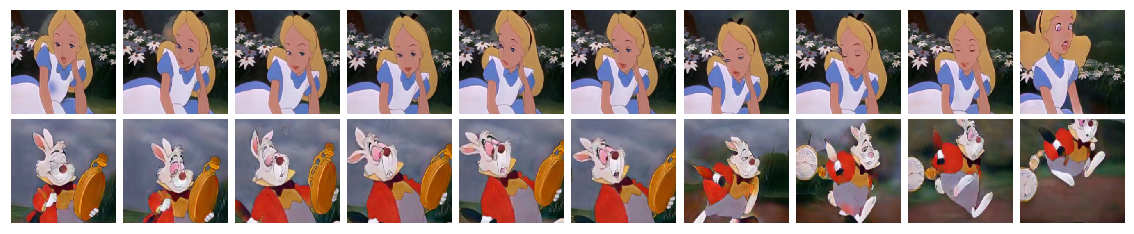

In [300]:
alice_exp_200 = sort_paths(glob('./images/alice_exp_test_dir/'+edge_type),11)
generated_C = alice_exp_200[dstart:d_middle-2:2] + alice_exp_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_exp_200')

In [341]:
def plot_zoom(samples,n_row=1,n_col=1, ratio=2.0, rect_shape=None, edgecolor='r', saveas=None):
    fig = plt.figure(figsize=(n_row*ratio, n_col*ratio))
    gs = gridspec.GridSpec(n_row, n_col)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i]) 
        if rect_shape:
            for rs in rect_shape:
                rect = patches.Rectangle((rs[0],rs[1]),rs[2],rs[3],linewidth=1,edgecolor=edgecolor,facecolor='none')
                # Add the patch to the Axes
                ax.add_patch(rect)
        
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal') 
        plt.imshow(sample)
    if saveas:
        savefig('%s.pdf' % saveas, bbox_inches='tight')
    return fig


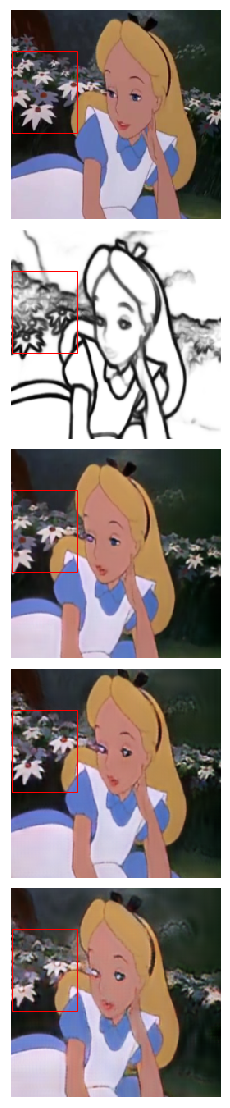

In [346]:
# test_idx = [100, 127]
test_idx = [100]
dat_120 = [gt_C, gt_E, alice_exp_200, alice_imp_200, cyclegan_200]

image_list = [ d[i] for i in test_idx for d in dat_120 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor = [[1,50,80,100]], 'r'
fig_zoom = plot_zoom(batch_images,n_row=5,n_col=1, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor, saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))

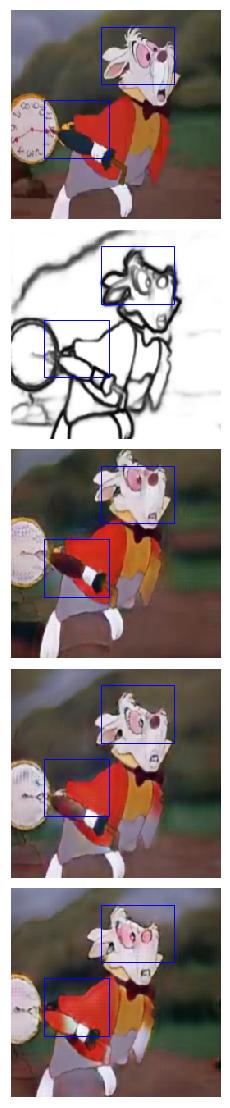

In [368]:
# test_idx = [100, 127]
test_idx = [136]
dat_120 = [gt_C, gt_E, alice_exp_200, alice_imp_200, cyclegan_200]

image_list = [ d[i] for i in test_idx for d in dat_120 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor =[[110,20,90,70], [40,110,80,70]], 'b'
fig_zoom = plot_zoom(batch_images,n_row=5,n_col=1, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor, saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))

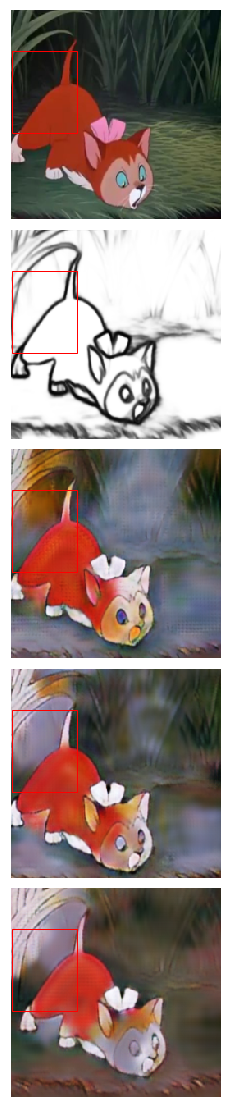

In [377]:
# test_idx = [100, 127]
test_idx = [4]
dat_120 = [gt_C, gt_E, alice_exp_200, alice_imp_200, cyclegan_200]

image_list = [ d[i] for i in test_idx for d in dat_120 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor = [[1,50,80,100]], 'r'
fig_zoom = plot_zoom(batch_images,n_row=5,n_col=1, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor) # , saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))